In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

# Reading Dataset

In [2]:
data=pd.read_csv("datahealth.csv")

In [3]:
df=data.copy()
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# Basic Analysis

In [4]:
df.shape

(3424, 69)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

# Data Cleansing and Transformation:

Missing Values:

In [6]:
df.isnull().mean()

Ptid                              0.0
Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 69, dtype: float64

In [7]:
in_df=df.columns[df.dtypes!='object']
obj_df=df.columns[df.dtypes=='object']

In [8]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(obj_df, in_df)

Non-Numeric columns:
Ptid
Persistency_Flag
Gender
Race
Ethnicity
Region
Age_Bucket
Ntm_Speciality
Ntm_Specialist_Flag
Ntm_Speciality_Bucket
Gluco_Record_Prior_Ntm
Gluco_Record_During_Rx
Dexa_During_Rx
Frag_Frac_Prior_Ntm
Frag_Frac_During_Rx
Risk_Segment_Prior_Ntm
Tscore_Bucket_Prior_Ntm
Risk_Segment_During_Rx
Tscore_Bucket_During_Rx
Change_T_Score
Change_Risk_Segment
Adherent_Flag
Idn_Indicator
Injectable_Experience_During_Rx
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
Comorb_Encounter_For_Immunization
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
Comorb_Vitamin_D_Deficiency
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
Comorb_Long_Term_Current_Drug_Therapy
Comorb_Dorsalgia
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Comorb_Osteoporosis_without_current_path

In [9]:
print(in_df)

Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')


In [10]:
print(obj_df)

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of

In [11]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [12]:
df[in_df].isnull().sum()

Dexa_Freq_During_Rx    0
Count_Of_Risks         0
dtype: int64

In [13]:
df[obj_df].isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Excessive_Thinness           0
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Length: 67, dtype: int64

Duplicate values:

In [14]:
duplicate=df[df.duplicated()]
duplicate

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


Outliers Detection and Removal:

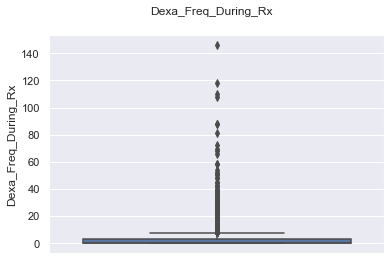

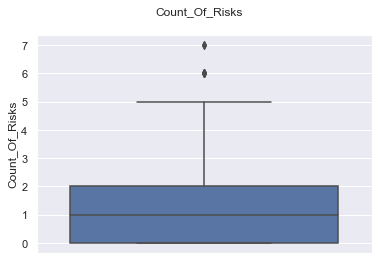

In [15]:
for x in df.columns[df.dtypes!=object]:
    fig=plt.figure()
    sns.boxplot(y=df[x],data=df)
    fig.suptitle(x)

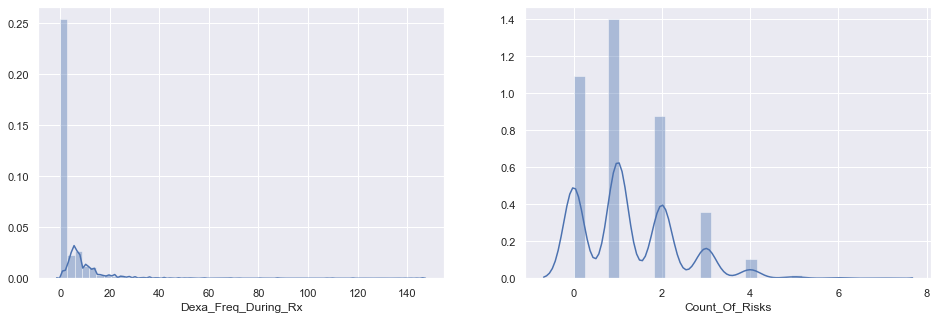

In [16]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Dexa_Freq_During_Rx'])
plt.subplot(1,2,2)
sns.distplot(df['Count_Of_Risks'])
plt.show()


In [17]:
percentile25 = df['Dexa_Freq_During_Rx'].quantile(0.25)
percentile75 = df['Dexa_Freq_During_Rx'].quantile(0.75)

In [18]:
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25 )
lower_limit = percentile25 - 1.5 * (percentile75 -percentile25 )

In [19]:
df[df['Dexa_Freq_During_Rx'] > upper_limit]
df[df['Dexa_Freq_During_Rx'] < lower_limit]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


In [20]:
df3 = df[df['Dexa_Freq_During_Rx'] < upper_limit]
df3.shape

(2964, 69)

In [21]:
df3_cap = df.copy()
df3_cap['Dexa_Freq_During_Rx'] = np.where(
    df3_cap['Dexa_Freq_During_Rx'] > upper_limit,
    upper_limit,
    np.where(
        df3_cap['Dexa_Freq_During_Rx'] < lower_limit,
        lower_limit,
        df3_cap['Dexa_Freq_During_Rx']
    )
)

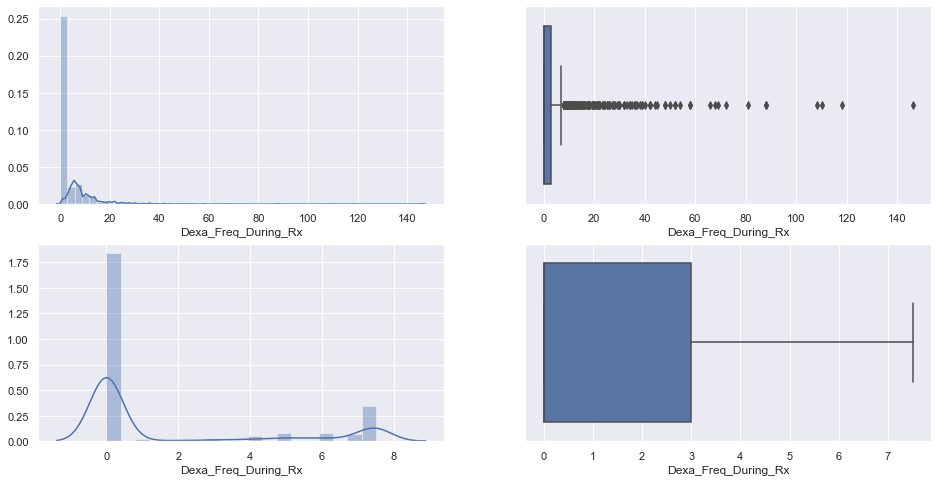

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Dexa_Freq_During_Rx'])
plt.subplot(2,2,2)
sns.boxplot(df['Dexa_Freq_During_Rx'])
plt.subplot(2,2,3)
sns.distplot(df3_cap['Dexa_Freq_During_Rx'])
plt.subplot(2,2,4)
sns.boxplot(df3_cap['Dexa_Freq_During_Rx'])
plt.show()

In [23]:
percentile25 = df3_cap['Count_Of_Risks'].quantile(0.25)
percentile75 = df3_cap['Count_Of_Risks'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25 )
lower_limit = percentile25 - 1.5 * (percentile75 -percentile25 )
df3_cap[df3_cap['Count_Of_Risks'] > upper_limit]
df3_cap[df3_cap['Count_Of_Risks'] < lower_limit]
new_df = df3_cap[df3_cap['Count_Of_Risks'] < upper_limit]
new_df.shape

(3401, 69)

In [24]:
new_df_cap = df3_cap.copy()
new_df_cap['Count_Of_Risks'] = np.where(
    new_df_cap['Count_Of_Risks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Count_Of_Risks'] < lower_limit,
        lower_limit,
        new_df_cap['Count_Of_Risks']
    )
)

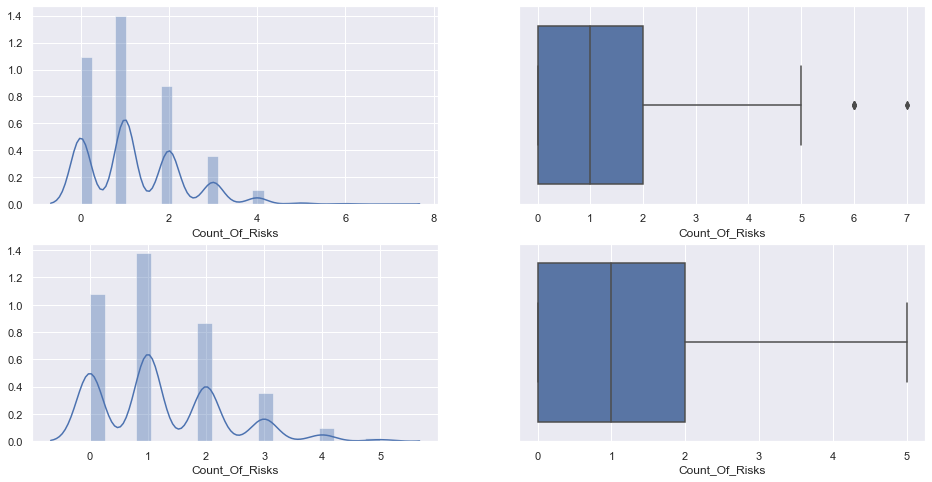

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df3_cap['Count_Of_Risks'])
plt.subplot(2,2,2)
sns.boxplot(df3_cap['Count_Of_Risks'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Count_Of_Risks'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Count_Of_Risks'])
plt.show()

<AxesSubplot:xlabel='Count_Of_Risks'>

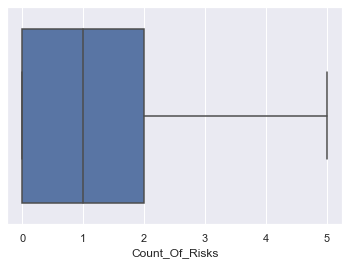

In [26]:
sns.boxplot(new_df_cap['Count_Of_Risks'])

<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

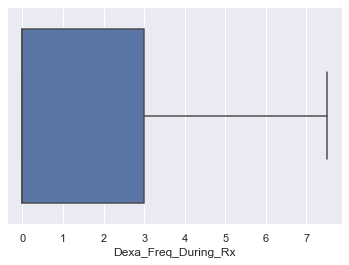

In [27]:
sns.boxplot(new_df_cap['Dexa_Freq_During_Rx'])

In [28]:
df=new_df_cap.copy()

Grouping Sparse Classes:

In [29]:
df1=df.drop(['Ptid'],axis=1)

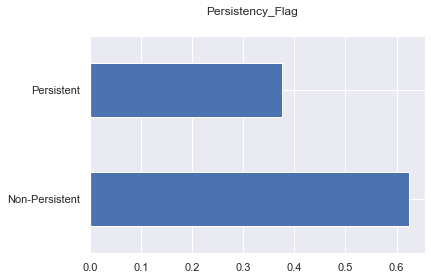

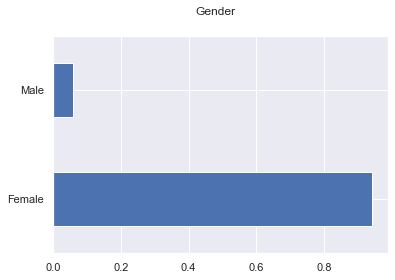

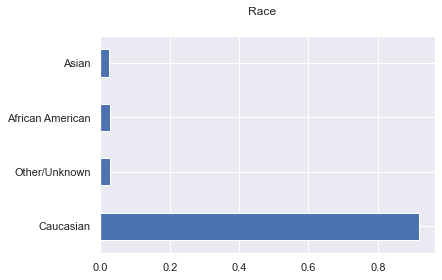

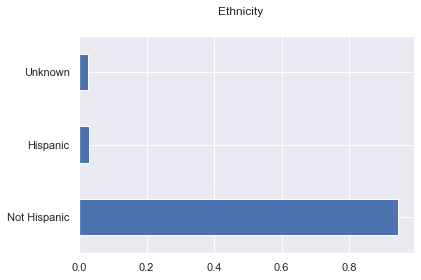

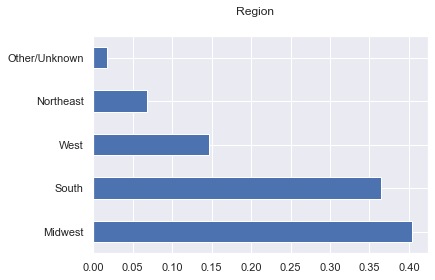

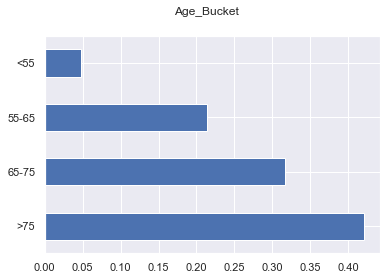

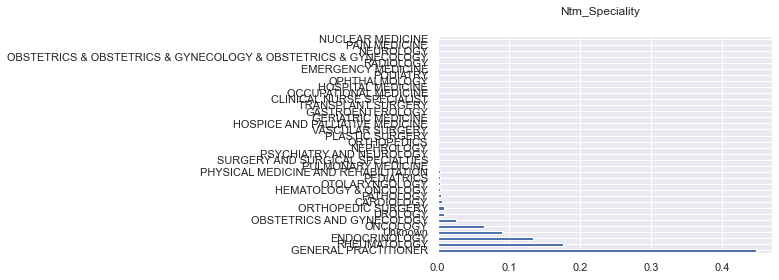

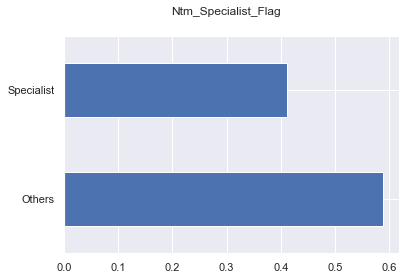

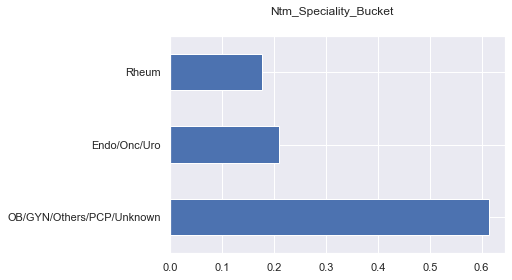

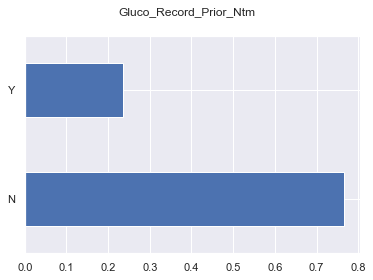

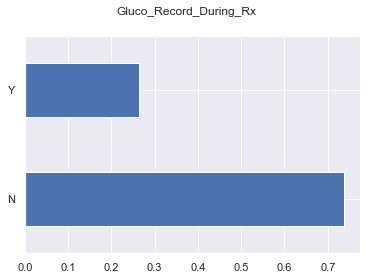

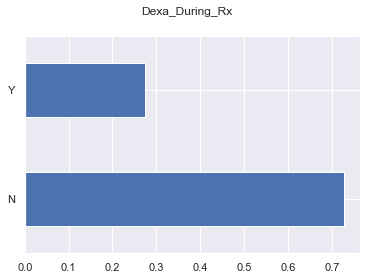

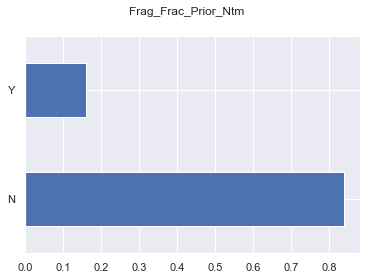

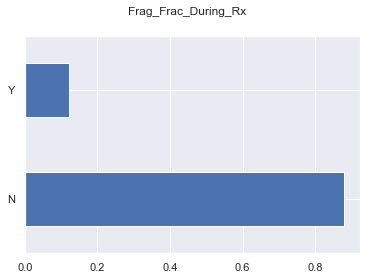

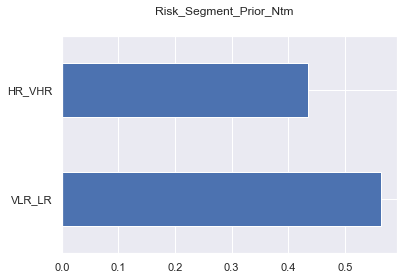

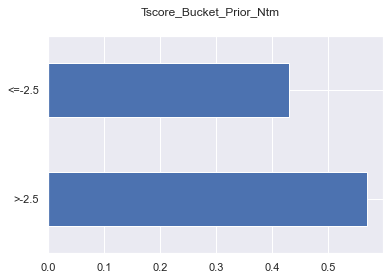

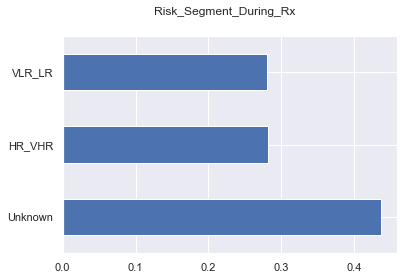

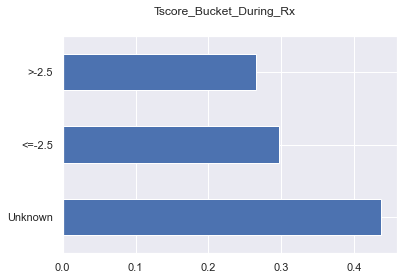

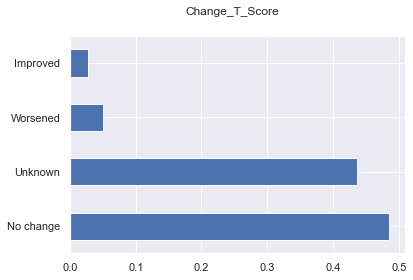

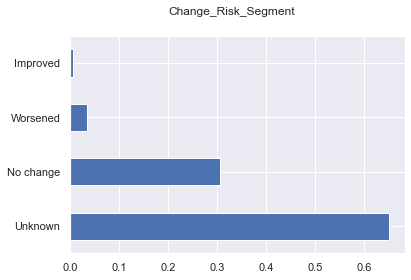

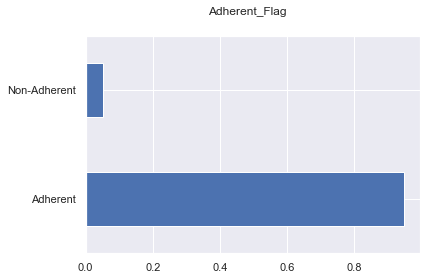

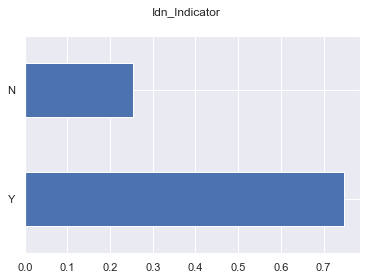

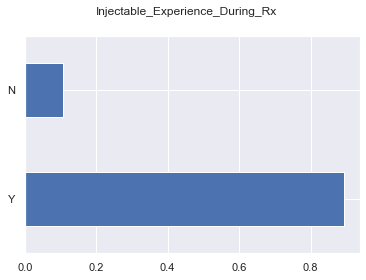

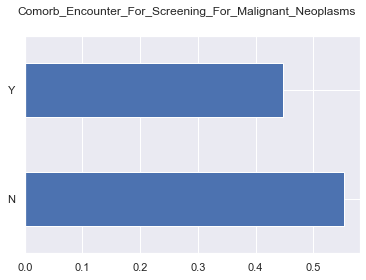

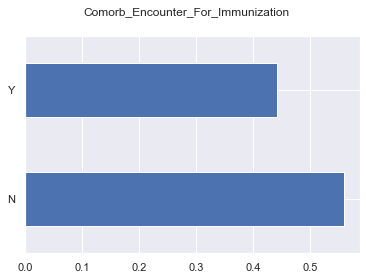

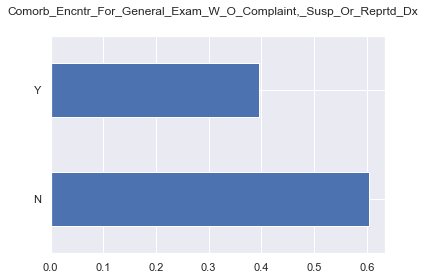

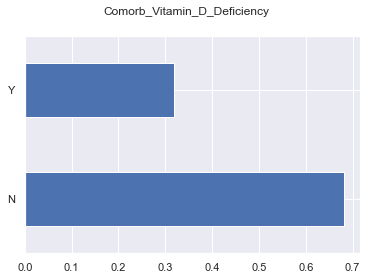

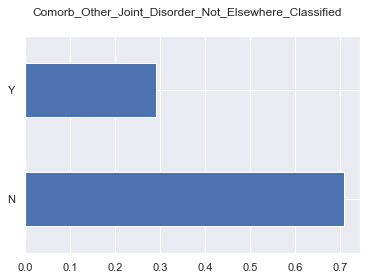

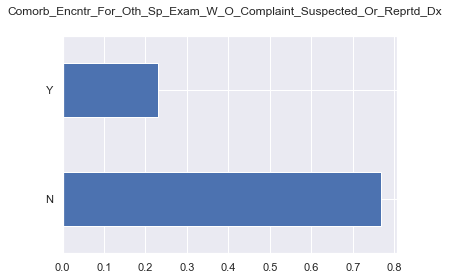

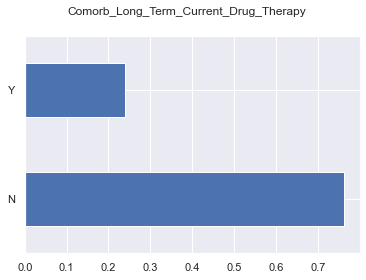

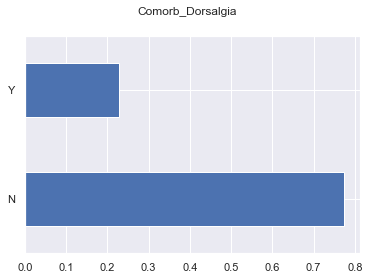

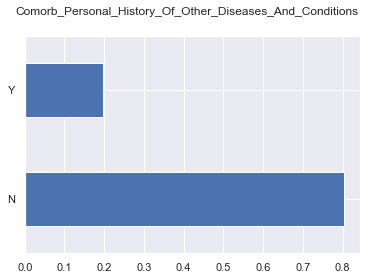

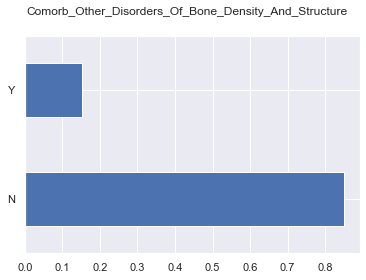

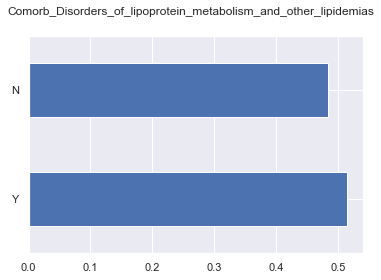

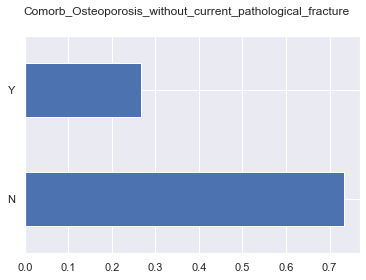

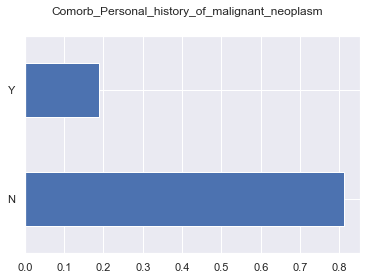

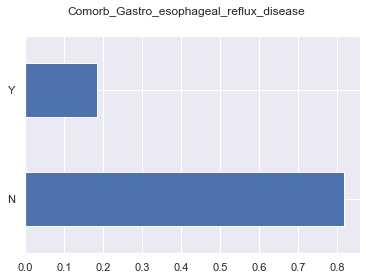

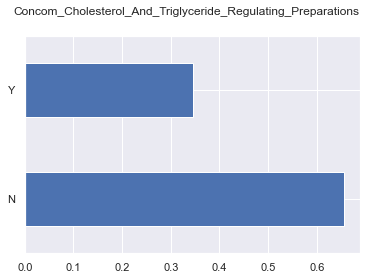

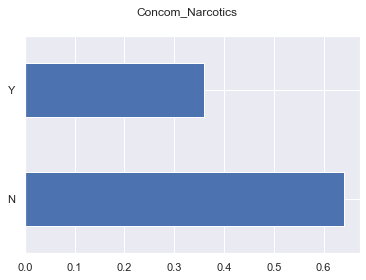

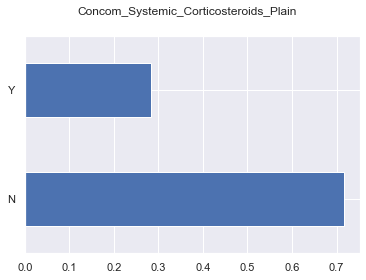

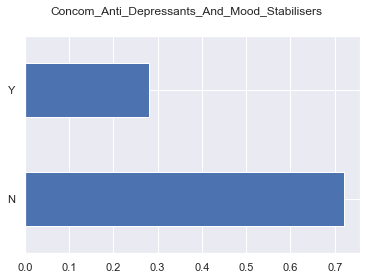

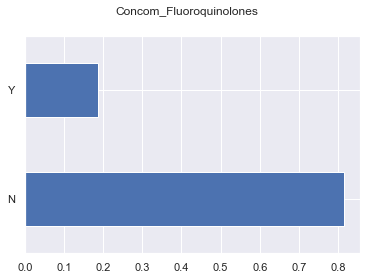

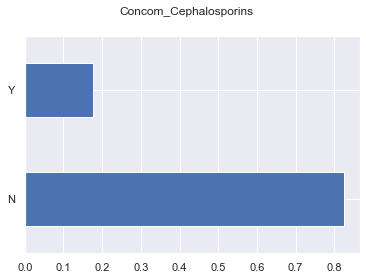

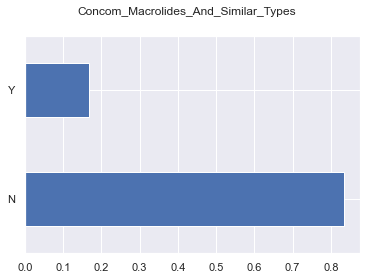

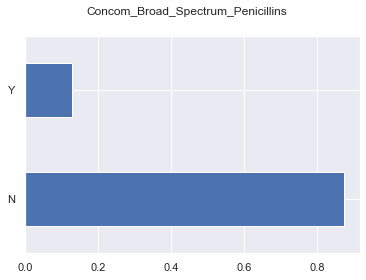

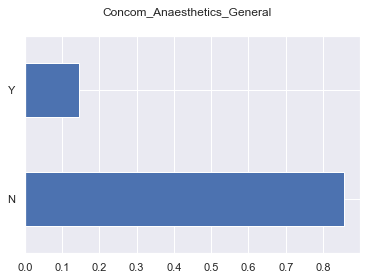

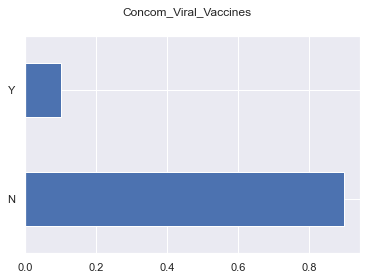

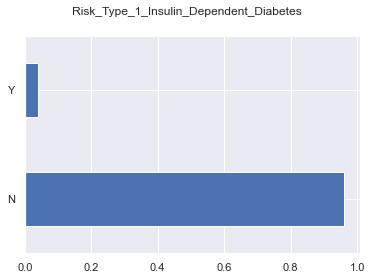

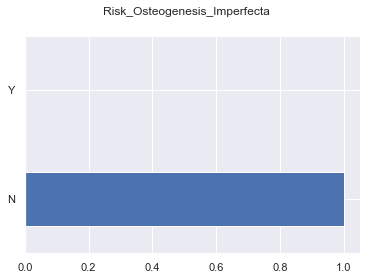

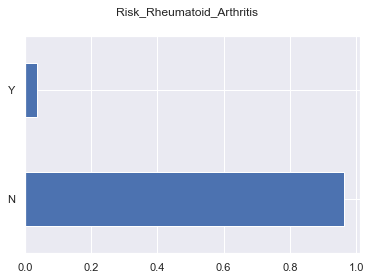

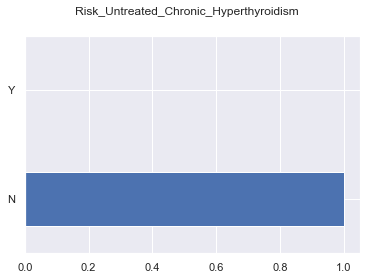

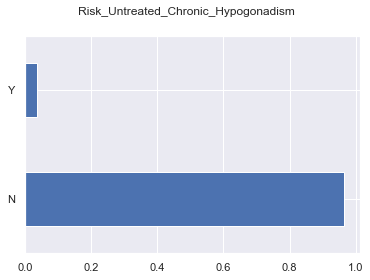

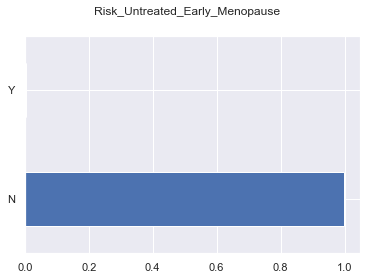

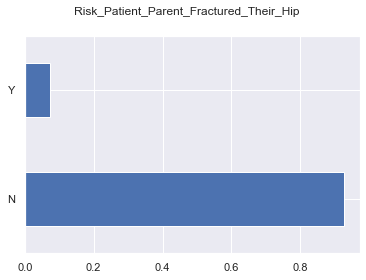

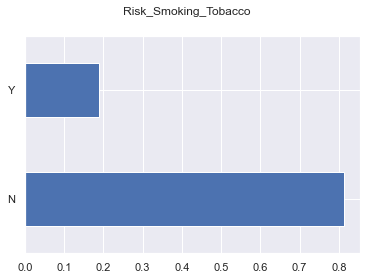

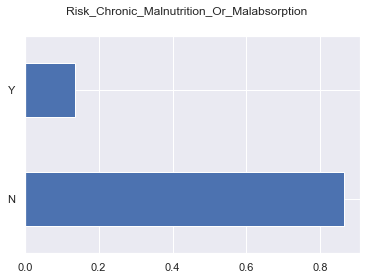

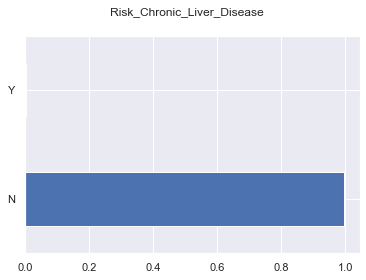

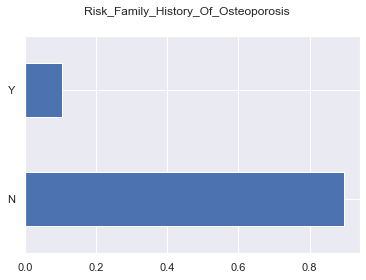

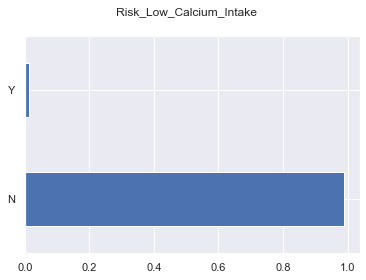

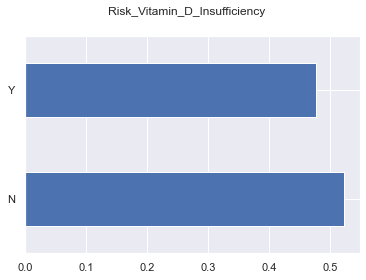

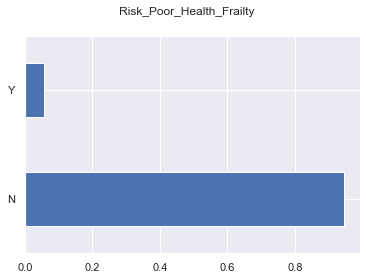

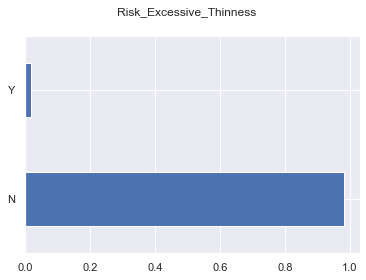

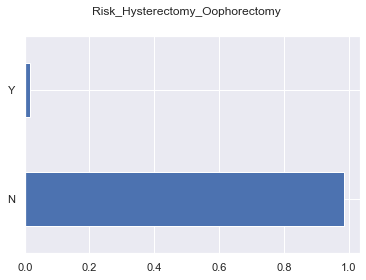

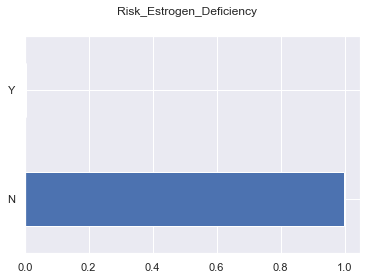

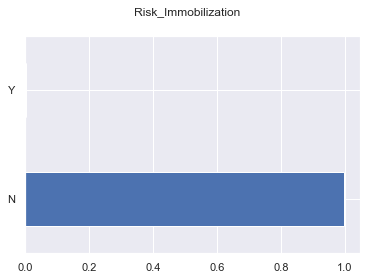

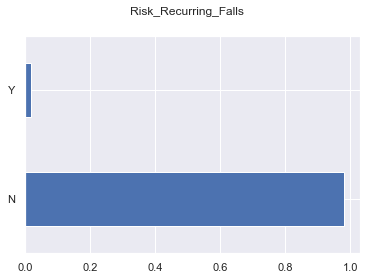

In [30]:
for x in df1.columns[df1.dtypes==object]:
    fig=plt.figure()
    df1[x].value_counts(normalize=True).plot(kind='barh')
    fig.suptitle(x)

In [31]:
df['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

In [32]:
conditions=[
    (df['Ntm_Speciality'] == 'GENERAL PRACTITIONER'),
(df['Ntm_Speciality'] == 'RHEUMATOLOGY'),
(df['Ntm_Speciality'] == 'ENDOCRINOLOGY'),
(df['Ntm_Speciality'] == 'ONCOLOGY')
]

In [33]:
choices=['GENERAL PRACTITIONER','RHEUMATOLOGY','ENDOCRINOLOGY','ONCOLOGY']

In [34]:
df['Ntm_Speciality_Cat'] = np.select(conditions, choices, default='other')

In [35]:
df['Ntm_Speciality_Cat'].value_counts()

GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
other                    602
ENDOCRINOLOGY            458
ONCOLOGY                 225
Name: Ntm_Speciality_Cat, dtype: int64

In [36]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0.0,GENERAL PRACTITIONER
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0.0,GENERAL PRACTITIONER
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,2.0,GENERAL PRACTITIONER
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1.0,GENERAL PRACTITIONER
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1.0,GENERAL PRACTITIONER


Categorical data encoding and computing correlation:

In [37]:
df.corr()

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.063414
Count_Of_Risks,0.063414,1.000000


In [38]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing 

In [39]:
def number_encode_features(df): 
    result = df.copy()     
    encoders = {}     
    for column in result.columns:         
        if result.dtypes[column] == np.object:             
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]
) 
    return result, encoders  
# Calculate the correlation and plot it 
encoded_data, _ = number_encode_features(df)
encoded_data.drop(['Ptid'],axis=1).corr()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
Persistency_Flag,1.000000,0.010343,-0.002052,0.001630,0.084415,-0.001976,-0.003143,0.139387,-0.112617,-0.005758,...,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082431,-0.043667
Gender,0.010343,1.000000,0.009530,0.029018,0.015179,0.076696,0.058281,0.010406,-0.019670,0.024992,...,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002457,0.046190
Race,-0.002052,0.009530,1.000000,-0.028989,-0.012944,-0.001512,-0.029418,-0.003044,-0.009140,0.035363,...,0.007740,-0.032665,-0.000236,0.002434,-0.001218,0.007310,0.008251,-0.007419,0.001930,-0.041562
Ethnicity,0.001630,0.029018,-0.028989,1.000000,-0.051424,0.001757,0.046276,-0.033124,0.055679,0.019482,...,-0.021618,-0.006608,-0.041106,-0.025696,-0.008876,0.000494,0.000558,0.010095,-0.056651,0.048445
Region,0.084415,0.015179,-0.012944,-0.051424,1.000000,0.000325,-0.070516,0.002521,-0.093558,-0.042128,...,-0.060774,0.099222,-0.010350,0.017853,0.025917,-0.034017,-0.022612,-0.005100,0.085319,-0.102258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Risk_Estrogen_Deficiency,-0.012155,-0.013913,0.007310,0.000494,-0.034017,-0.001795,0.020549,0.025867,-0.021976,-0.007134,...,-0.006327,-0.012976,-0.013837,-0.008020,-0.007186,1.000000,-0.003638,-0.008142,0.078159,0.042243
Risk_Immobilization,-0.049787,0.004093,0.008251,0.000558,-0.022612,0.032081,0.021763,-0.016451,0.003380,-0.003146,...,-0.007140,-0.024640,0.262889,-0.009052,0.028624,-0.003638,1.000000,0.023381,0.100126,0.029212
Risk_Recurring_Falls,-0.021345,0.036774,-0.007419,0.010095,-0.005100,0.055252,0.017813,0.023502,0.004214,-0.001089,...,0.002901,0.020936,0.046352,0.084778,-0.001471,-0.008142,0.023381,1.000000,0.183651,0.007622
Count_Of_Risks,0.082431,0.002457,0.001930,-0.056651,0.085319,-0.030005,-0.000799,0.114095,-0.017185,0.116121,...,0.149635,0.552934,0.284397,0.183343,0.143374,0.078159,0.100126,0.183651,1.000000,-0.041675


In [40]:
def get_redundant_pairs(encoded_data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = encoded_data.columns
    for i in range(0, encoded_data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(encoded_data, n=5):
    au_corr = encoded_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(encoded_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(encoded_data, 3))

Top Absolute Correlations
Dexa_Freq_During_Rx     Dexa_During_Rx             0.948994
Ntm_Speciality          Ntm_Speciality_Cat         0.868479
Risk_Segment_Prior_Ntm  Tscore_Bucket_Prior_Ntm    0.866841
dtype: float64


# Exploratory Data Analysis:

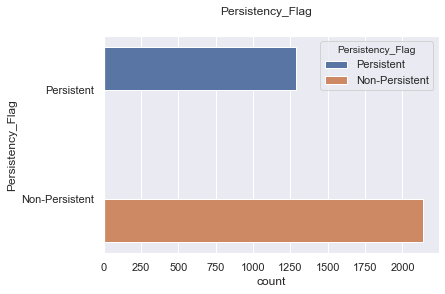

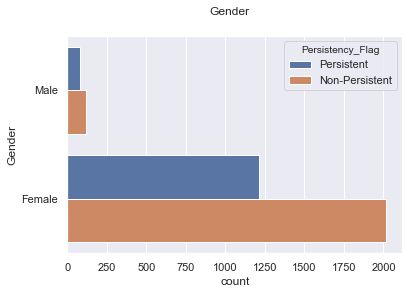

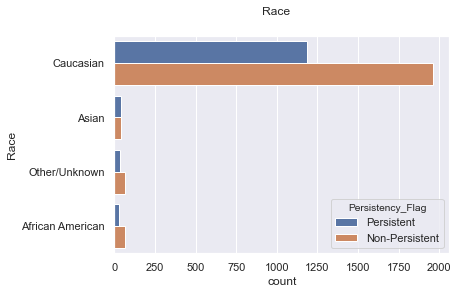

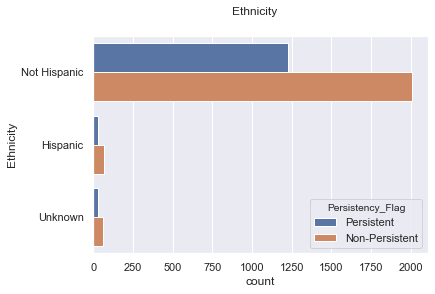

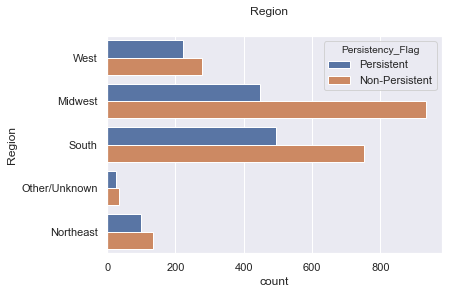

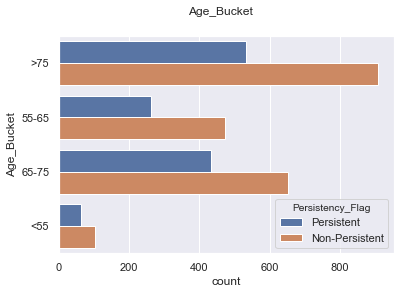

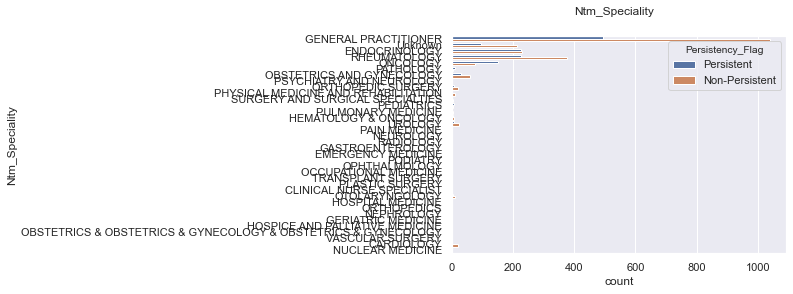

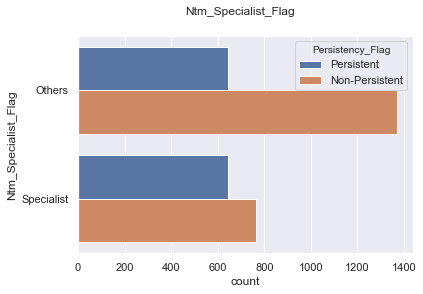

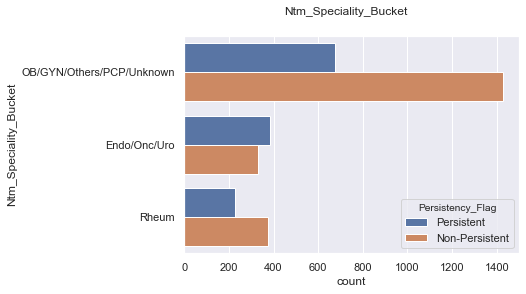

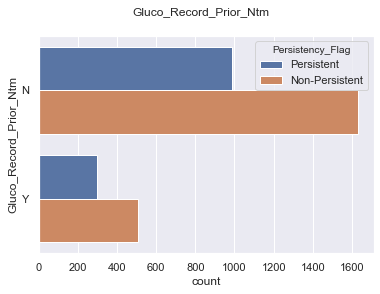

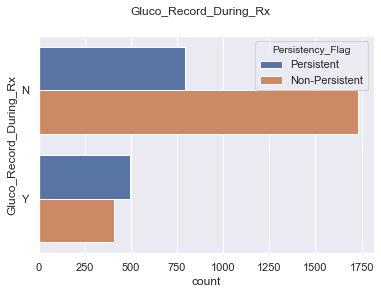

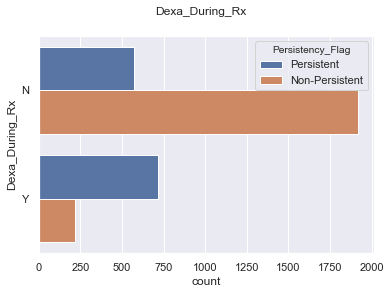

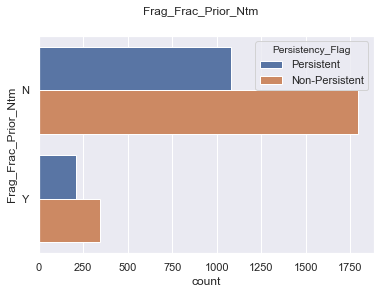

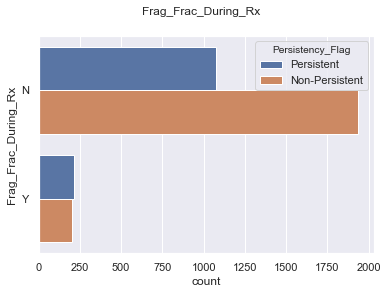

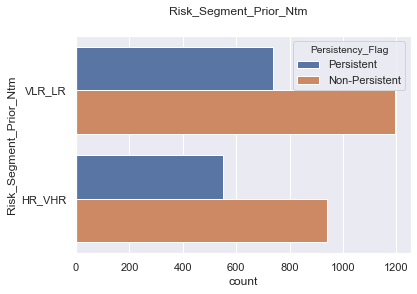

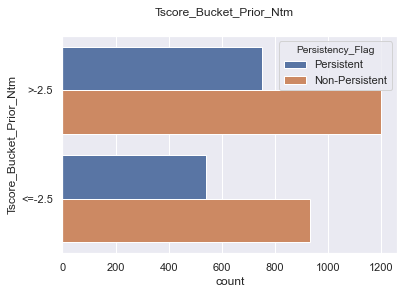

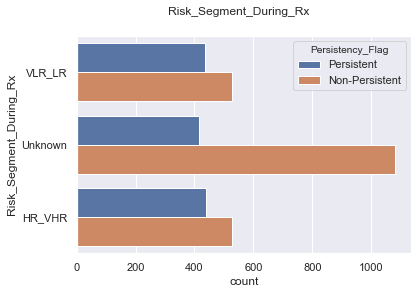

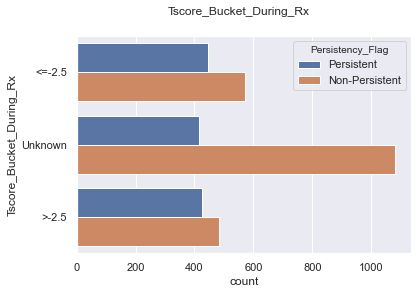

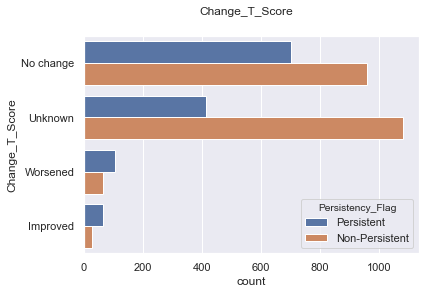

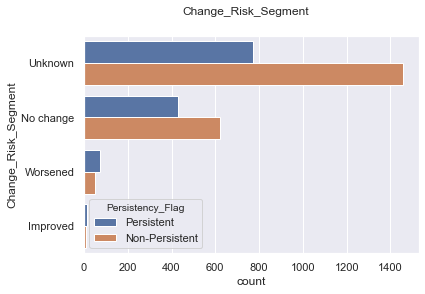

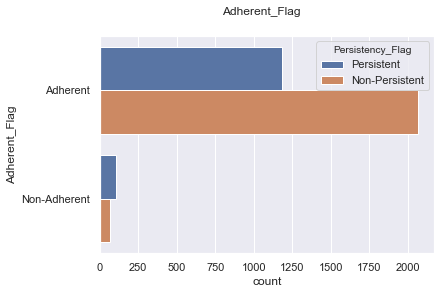

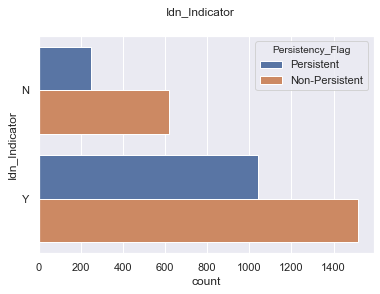

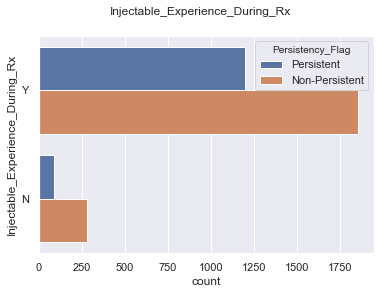

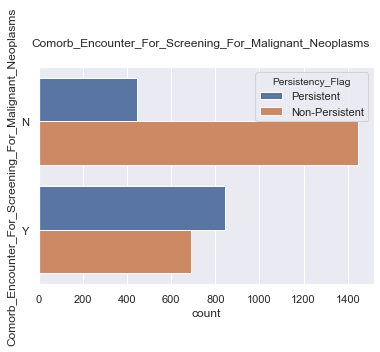

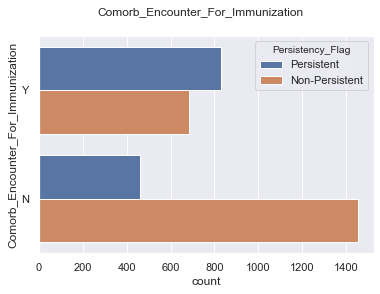

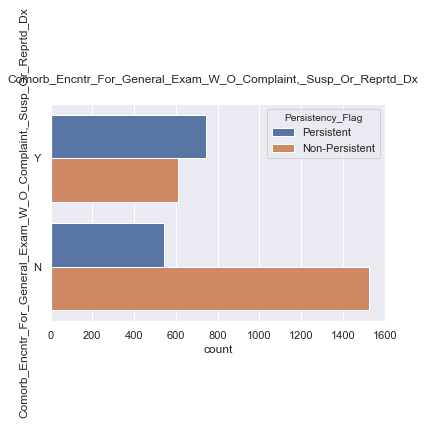

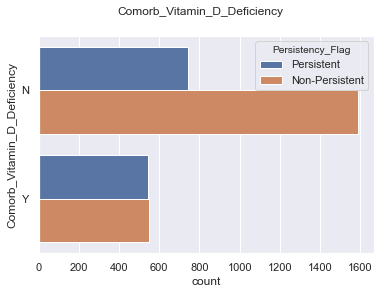

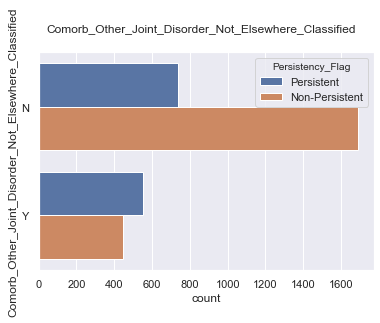

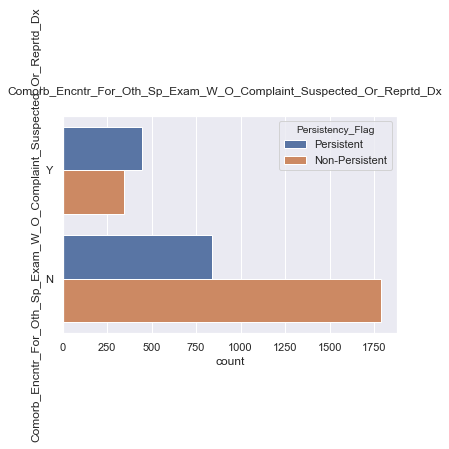

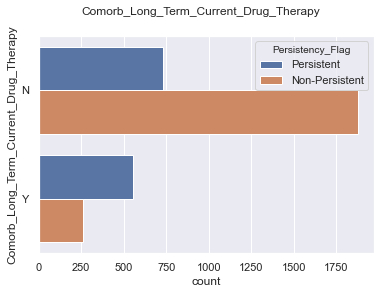

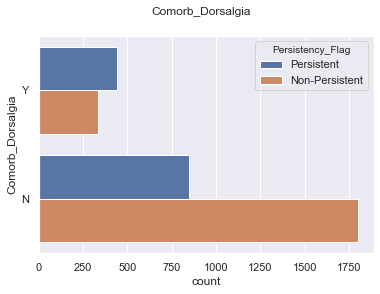

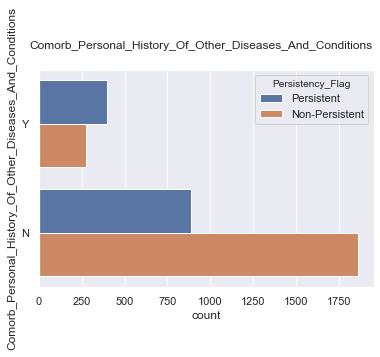

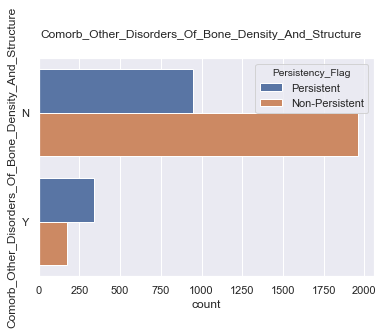

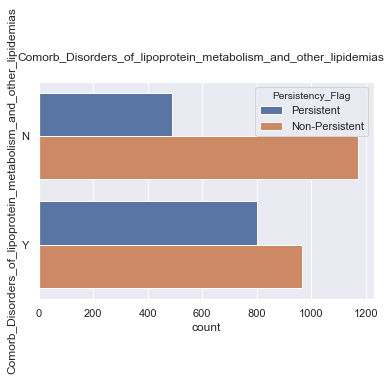

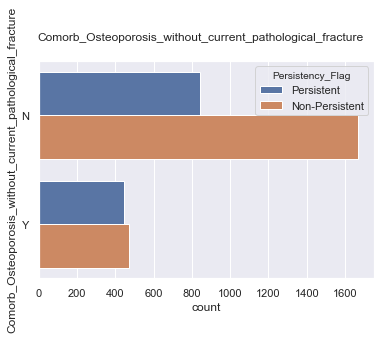

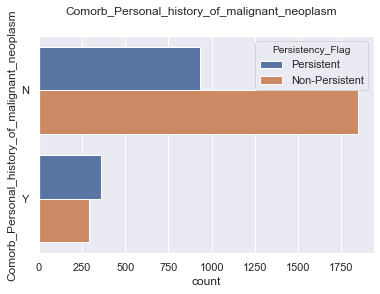

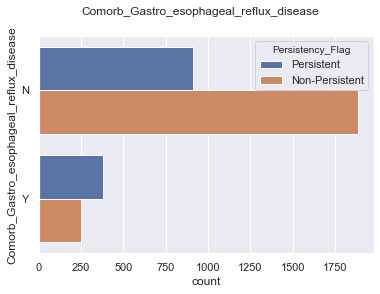

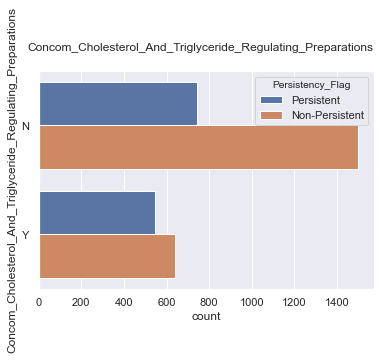

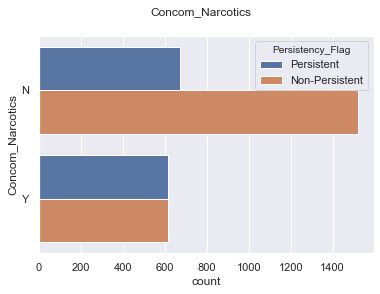

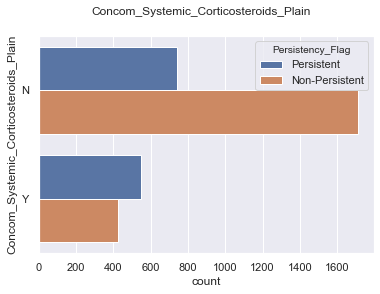

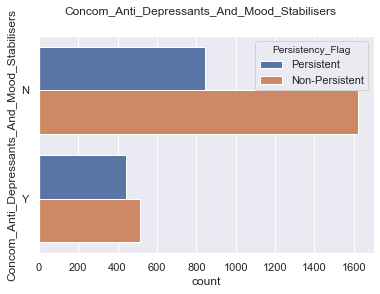

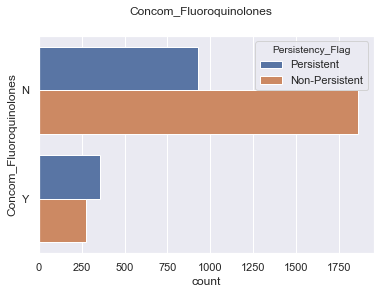

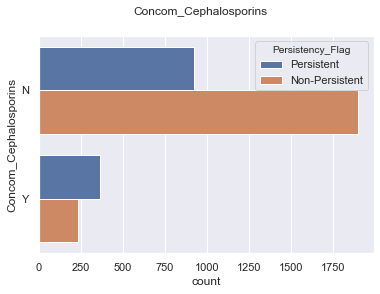

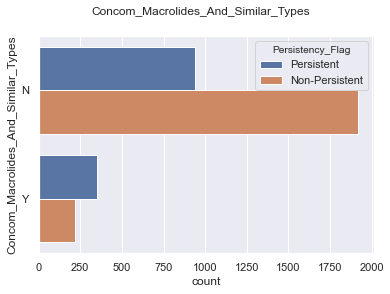

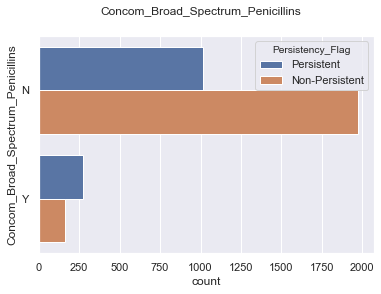

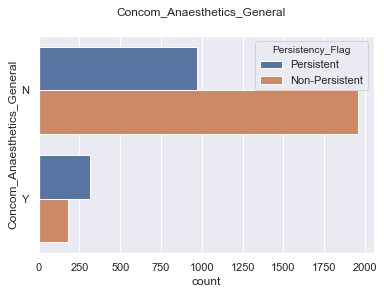

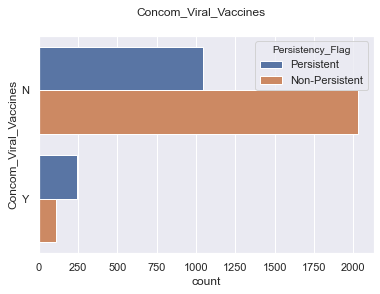

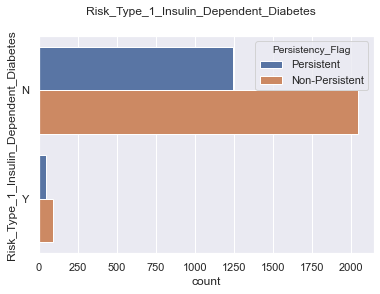

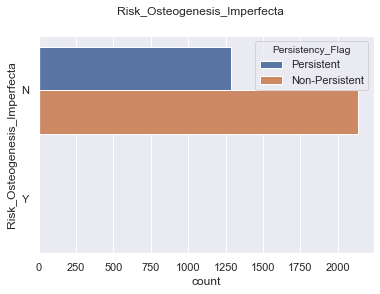

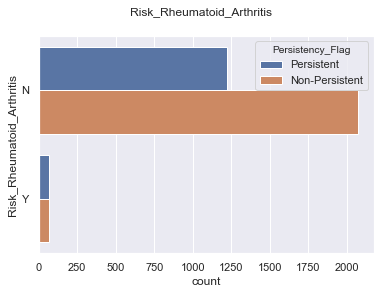

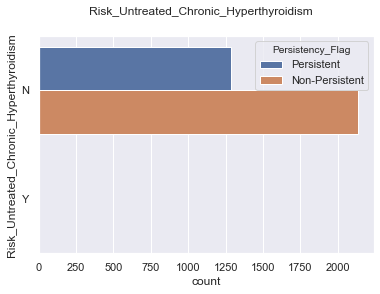

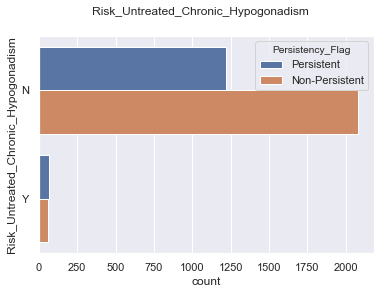

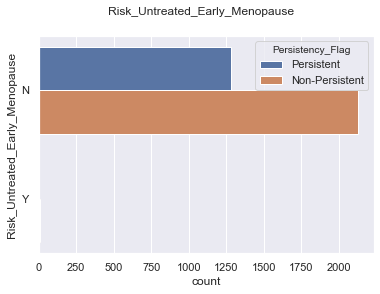

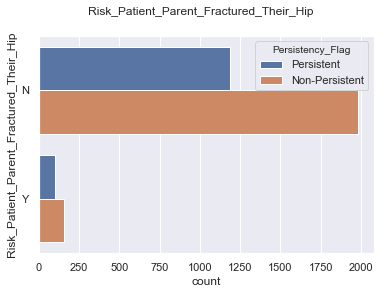

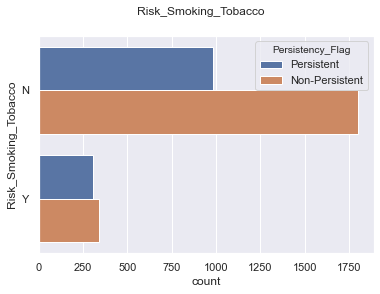

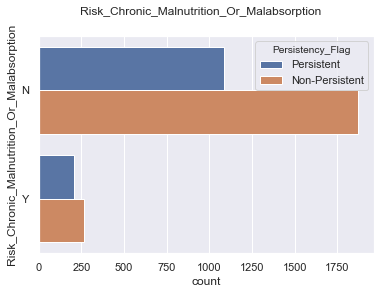

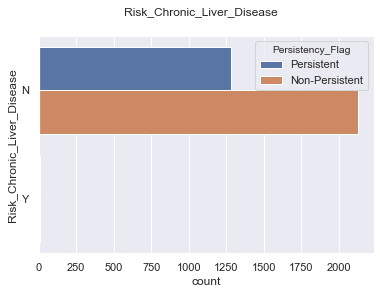

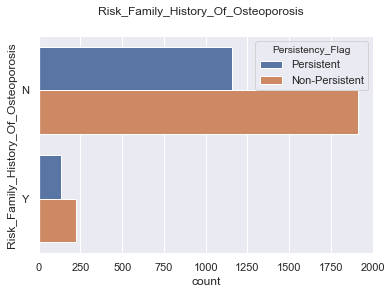

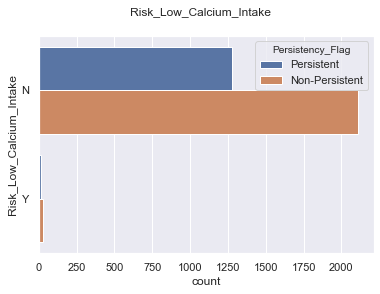

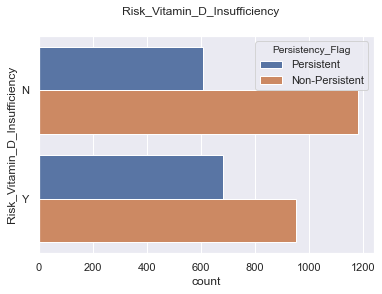

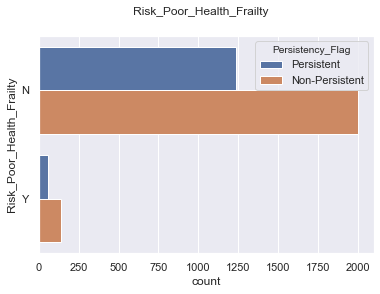

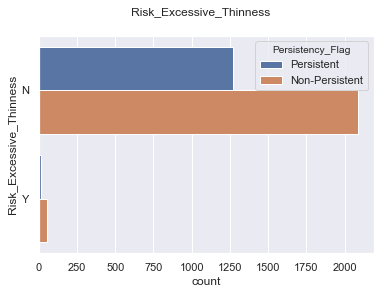

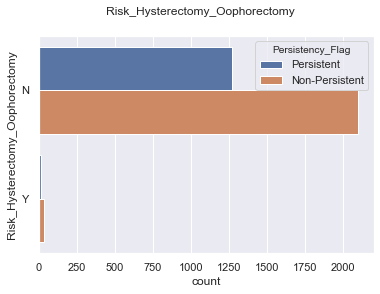

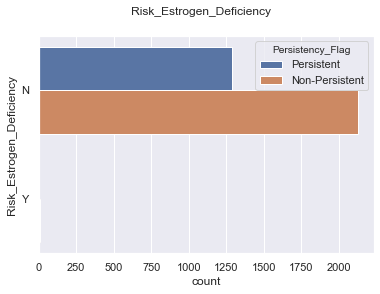

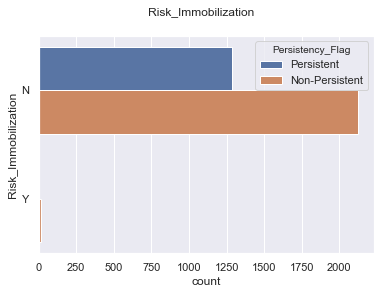

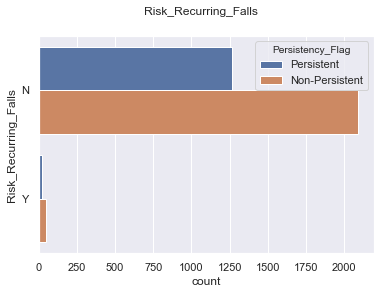

In [41]:
for x in df1.columns[df1.dtypes==object]:
    fig=plt.figure()
    sns.countplot(y=df1[x],hue=df1['Persistency_Flag'],data=df1)
    fig.suptitle(x)

In [43]:
data=df.groupby('Persistency_Flag')['Gender'].value_counts(normalize=True)

([<matplotlib.patches.Wedge at 0x11e743d0>,
 [Text(0.0988710495689853, 1.1457419061713363, "('Non-Persistent', 'Female')"),
  Text(-1.1457419073284583, 0.0988710361599731, "('Non-Persistent', 'Male')"),
  Text(-0.10775019984201756, -1.144941000416181, "('Persistent', 'Female')"),
  Text(1.144940996633067, -0.107750240040935, "('Persistent', 'Male')")],
 [Text(0.047286154141688616, 0.547963520342813, '47.3%'),
  Text(-0.5479635208962191, 0.04728614772868278, '2.7%'),
  Text(-0.05153270427226926, -0.5475804784599126, '47.0%'),
  Text(0.5475804766505973, -0.05153272349783848, '3.0%')])

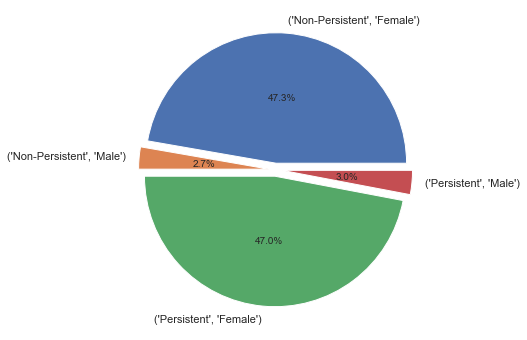

In [44]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

<AxesSubplot:ylabel='Persistency_Flag,Ethnicity'>

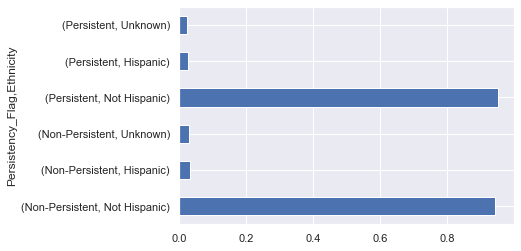

In [45]:
df.groupby('Persistency_Flag')['Ethnicity'].value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='Persistency_Flag,Region'>

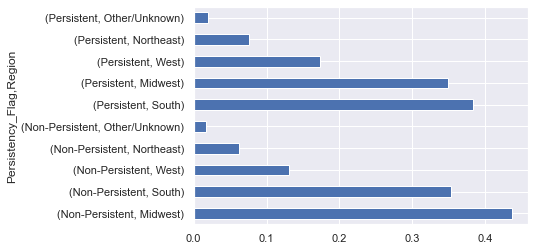

In [46]:
df.groupby('Persistency_Flag')['Region'].value_counts(normalize=True).plot.barh()

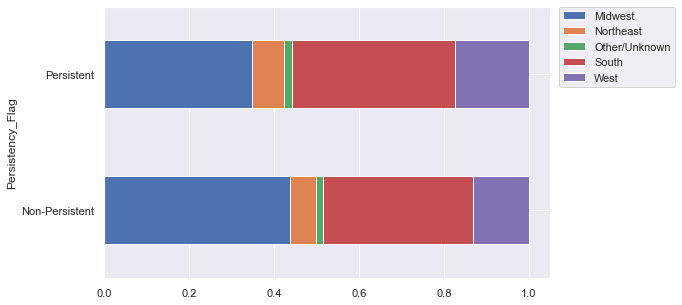

In [47]:
fig_dim=(8,5)
fig, ax= plt.subplots(figsize=fig_dim)
df.groupby('Persistency_Flag')['Region'].value_counts(normalize=True).unstack('Region').plot.barh(stacked=True,ax=ax);
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad=0)

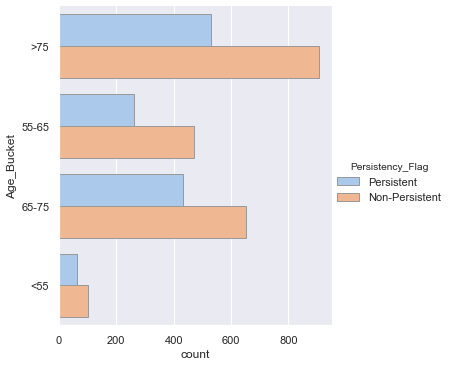

In [50]:
sns.catplot(y="Age_Bucket",hue="Persistency_Flag", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

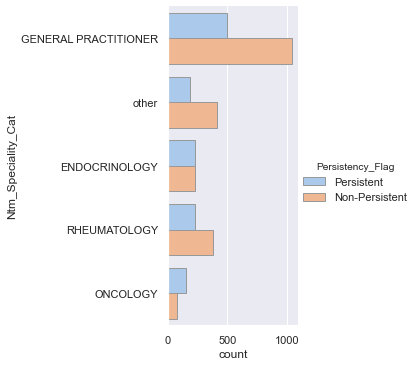

In [51]:
sns.catplot(y="Ntm_Speciality_Cat",hue="Persistency_Flag", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

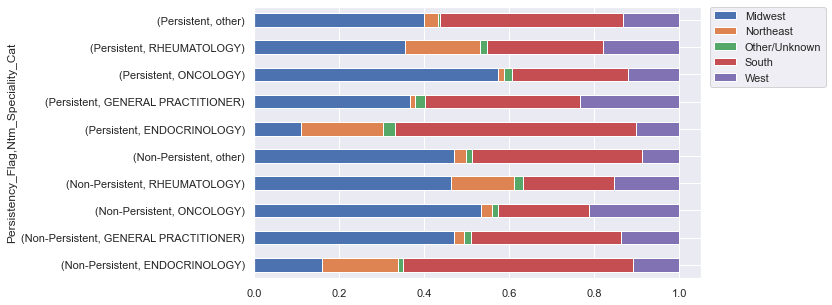

In [52]:
fig_dim=(8,5)
fig, ax= plt.subplots(figsize=fig_dim)
df.groupby(['Persistency_Flag','Ntm_Speciality_Cat'])['Region'].value_counts(normalize=True).unstack('Region').plot.barh(stacked=True,ax=ax);
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad=0)

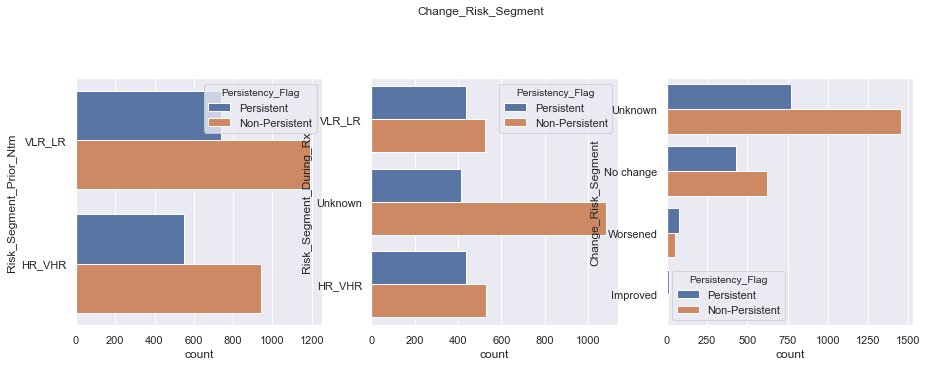

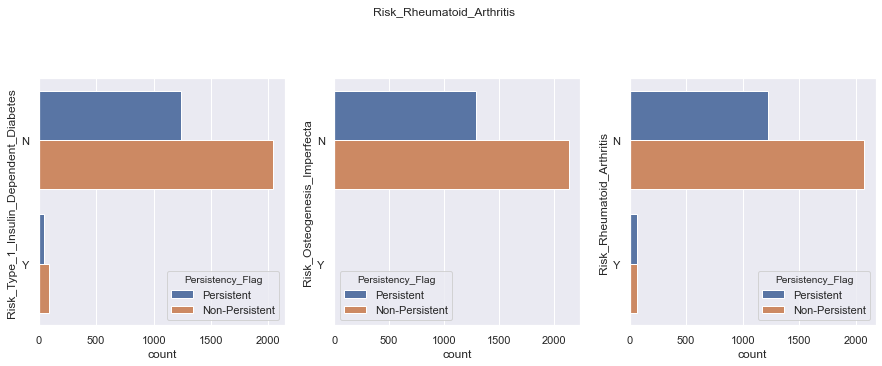

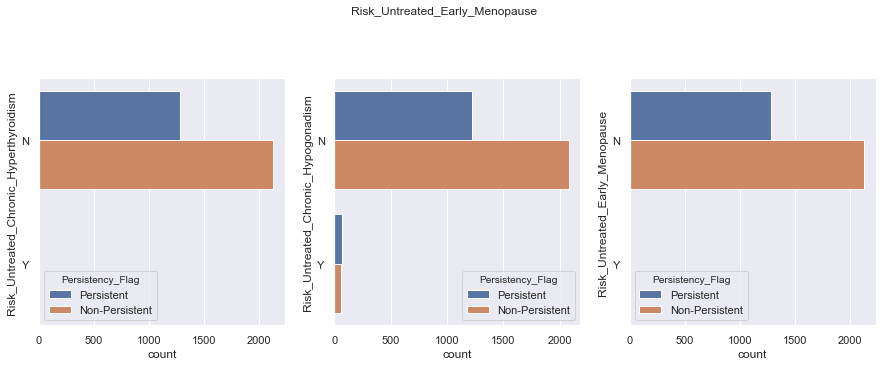

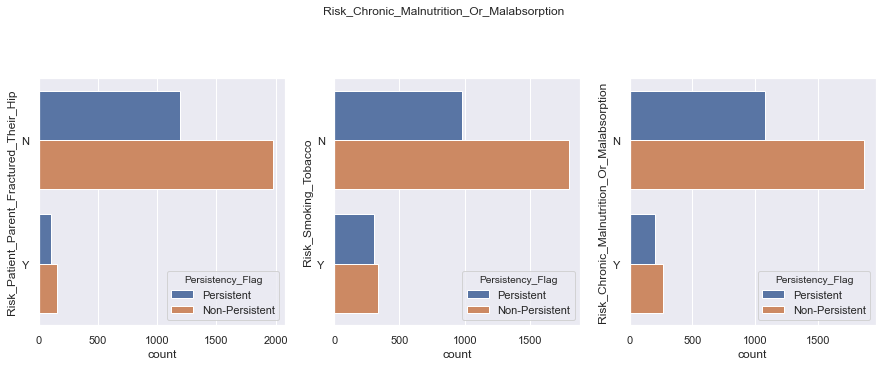

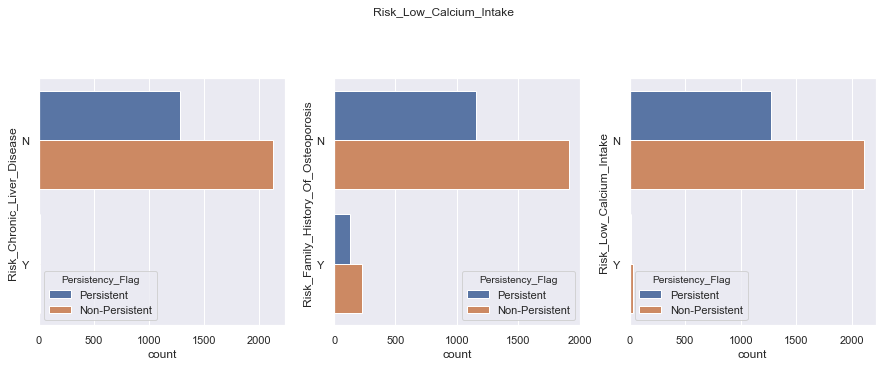

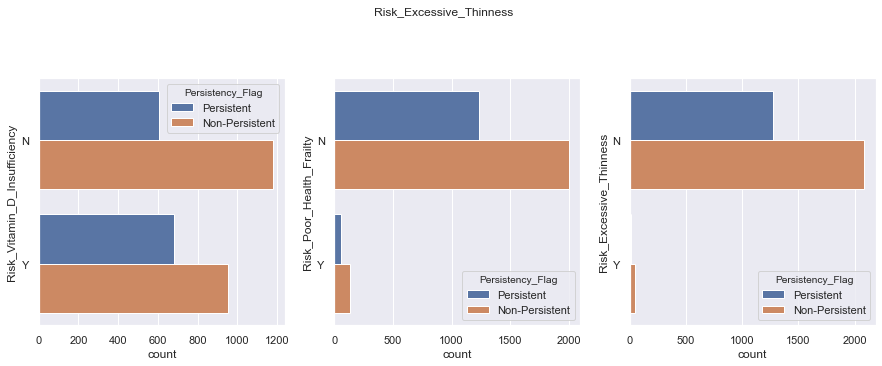

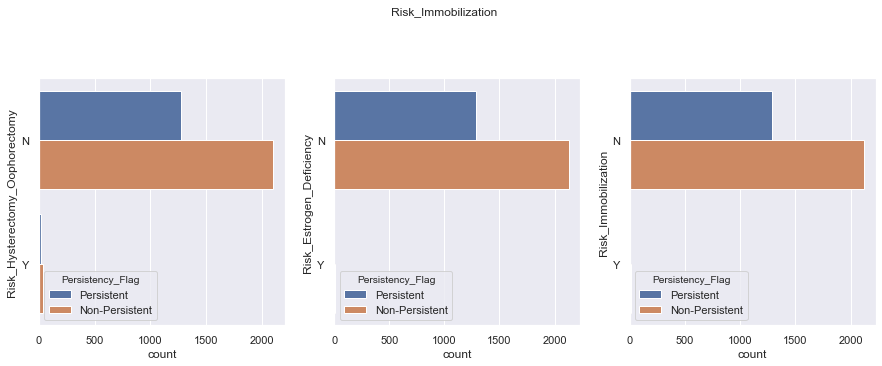

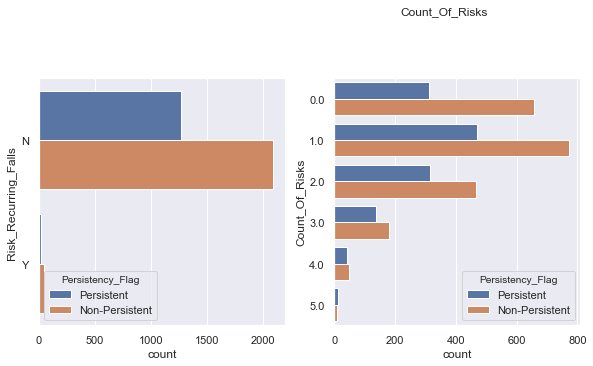

In [62]:
ix = 1
fig = plt.figure(figsize = (15,10))
risk_cols = [col for col in df.columns if 'Risk' in col]
for x in risk_cols:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

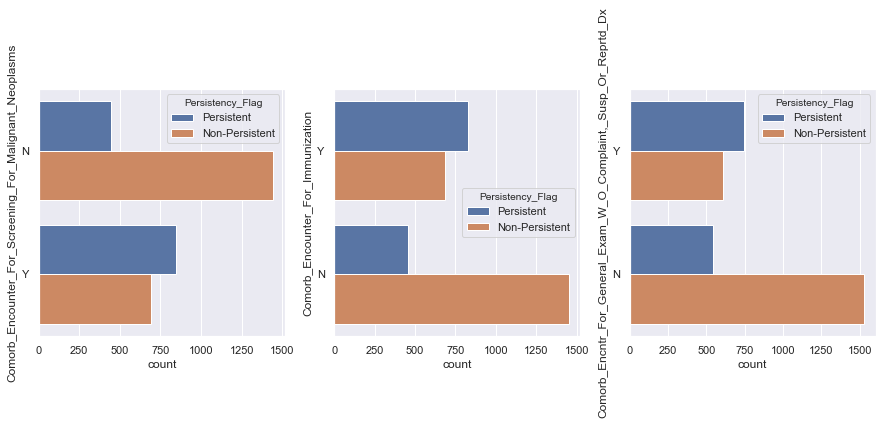

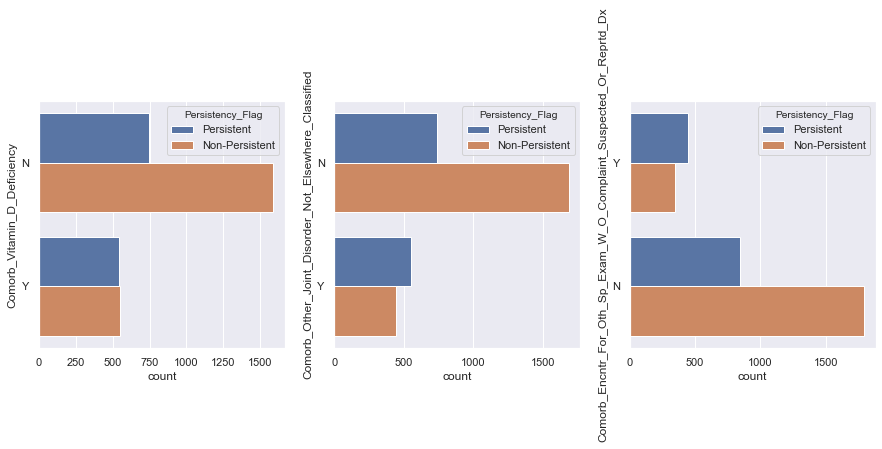

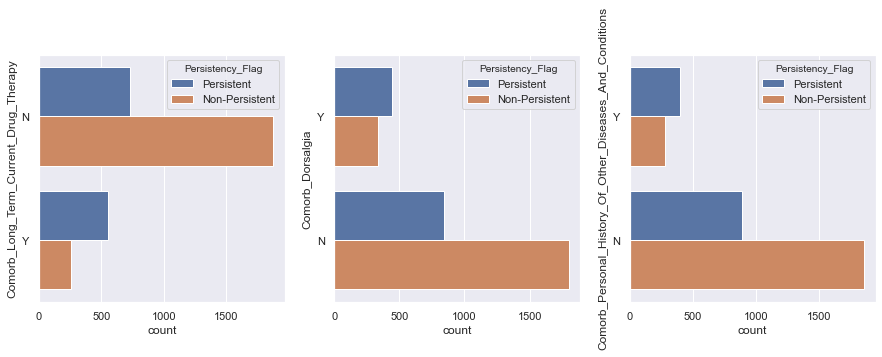

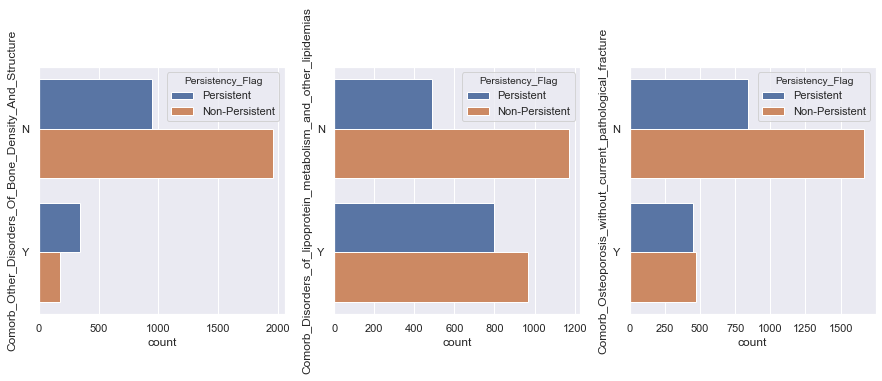

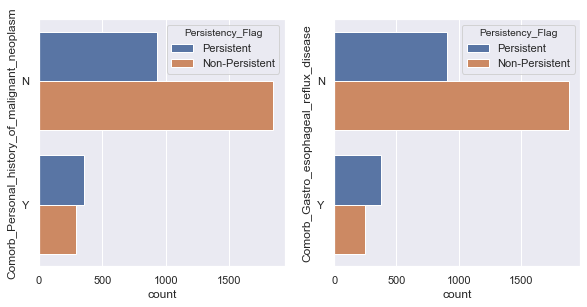

In [64]:
ix = 1
fig = plt.figure(figsize = (15,10))
comorb_cols = [col for col in df.columns if 'Comorb' in col]
for x in comorb_cols:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    #fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

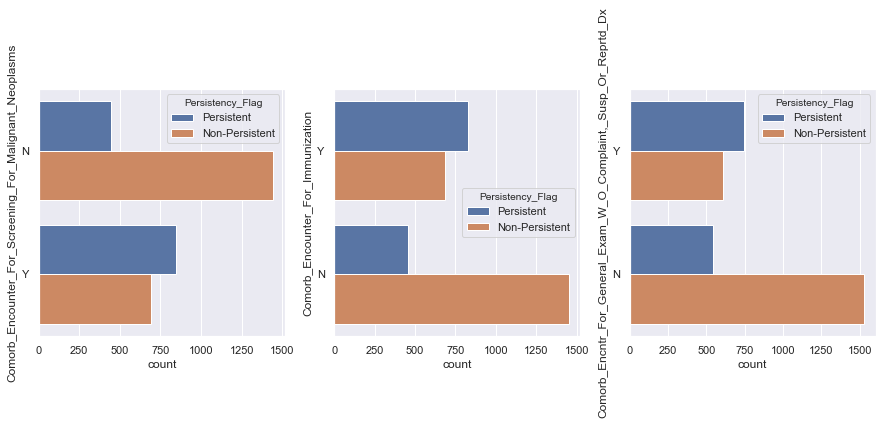

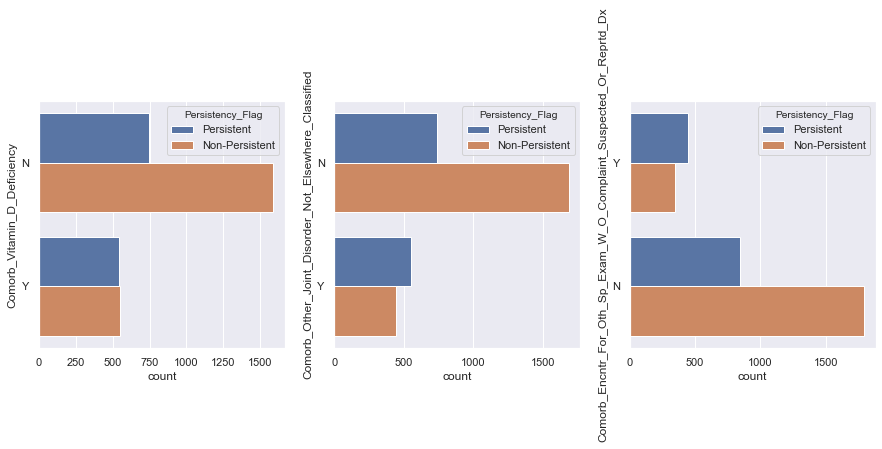

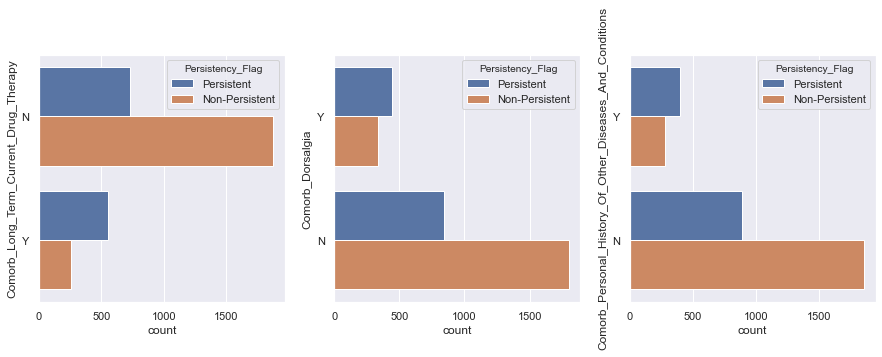

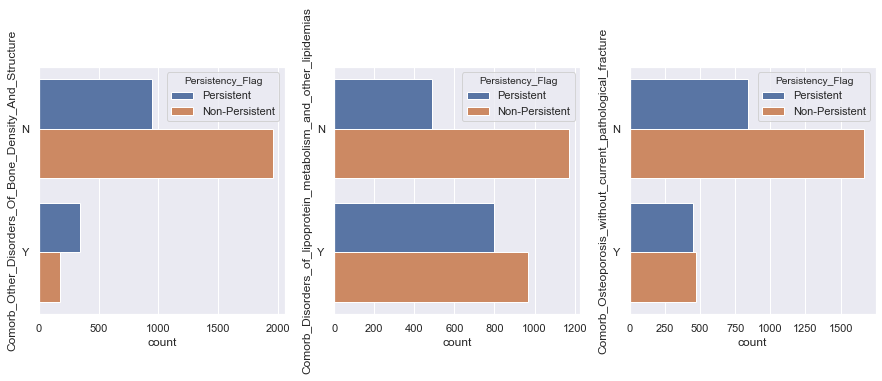

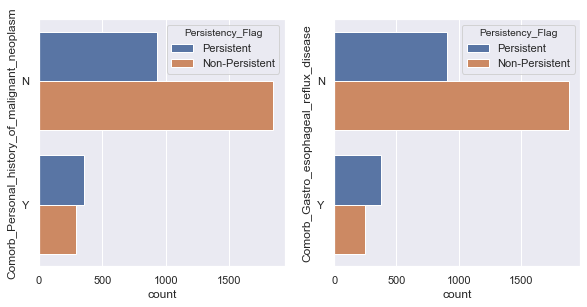

In [65]:
ix = 1
fig = plt.figure(figsize = (15,10))
concom_cols = [col for col in df.columns if 'Concom' in col]
for x in comorb_cols:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    #fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

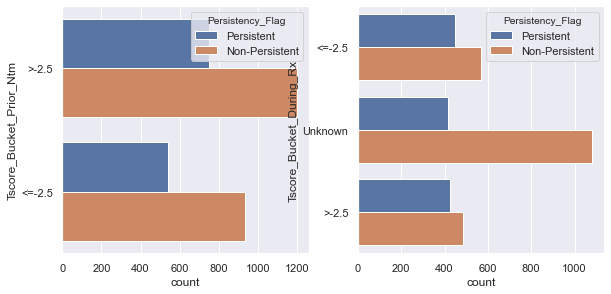

In [66]:
ix = 1
fig = plt.figure(figsize = (15,10))
t_score = [col for col in df.columns if 'Tscore' in col]
for x in t_score:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    #fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

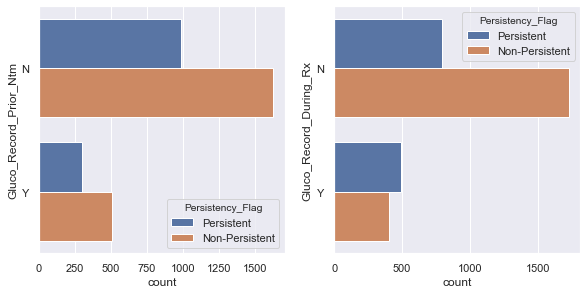

In [67]:
ix = 1
fig = plt.figure(figsize = (15,10))
gluco = [col for col in df.columns if 'Gluco' in col]
for x in gluco:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    #fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

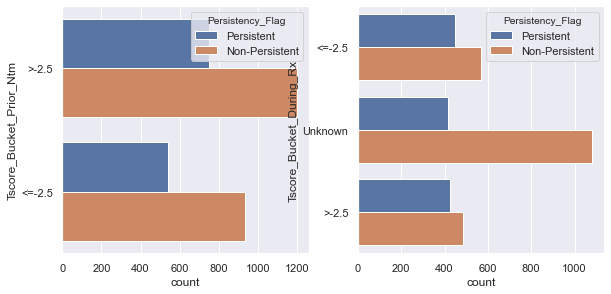

In [68]:
ix = 1
fig = plt.figure(figsize = (15,10))
frag = [col for col in df.columns if 'Frag' in col]
for x in t_score:
    #fig=plt.figure()
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df,ax=ax1)
    #fig.suptitle(x)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1